In [12]:
class Sentiment:
    def __init__(self):
        return None
    
    def strip_punctuation(self,word):
        punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']
        for char in word:
            if char in punctuation_chars:
                word=word.replace(char,"")
        return word.lower()
    
    def get_pos(self,sentence):
        count=0
        sentence=sentence.split(" ")
        positive_words_=self.positive_words()
        for word in sentence:
            word_stripped=self.strip_punctuation(word)
            if word_stripped.lower() in positive_words_:
                count+=1
        return count

    def get_neg(self,sentence):
        count=0
        sentence=sentence.split(" ")
        negative_words_=self.negative_words()
        for word in sentence:
            word_stripped=self.strip_punctuation(word)
            if word_stripped.lower() in negative_words_:
                count+=1
        return count
    
    def negative_words(self):
        negative_words = []
        with open("negative_words.txt") as pos_f:
            for lin in pos_f:
                if lin[0] != ';' and lin[0] != '\n':
                    negative_words.append(lin.strip())
        return negative_words

    def positive_words(self):
        positive_words = []
        with open("positive_words.txt") as pos_f:
            for lin in pos_f:
                if lin[0] != ';' and lin[0] != '\n':
                    positive_words.append(lin.strip())
        return positive_words

    def process(self):
        file_write=open("resulting_data.csv","w")
        file_write.write("Number of Retweets,Number of Replies,Positive Score,Negative Score,Net Score")
        file_write.write("\n")
        inputfile=open("project_twitter_data.csv","r")
        for line in inputfile:
            content=self.strip_punctuation(line)
            content=line.split(",")
            if len(content)>1 and content[1]!="retweet_count":
                lst=[]
                lst.append(content[1])
                lst.append(content[2].replace("\n",""))
                lst.append(self.get_pos(content[0]))
                lst.append(self.get_neg(content[0]))
                lst.append(self.get_pos(content[0])-self.get_neg(content[0]))
                row_string="{},{},{},{},{}".format(lst[0], lst[1],lst[2],lst[3],lst[4])
                file_write.write(row_string)
                file_write.write("\n")
        file_write.close()
        print("Done")
    


In [13]:
Sentiment=Sentiment()
Sentiment.process()

Done


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
content='resulting_data.csv'
df=pd.read_csv(content)


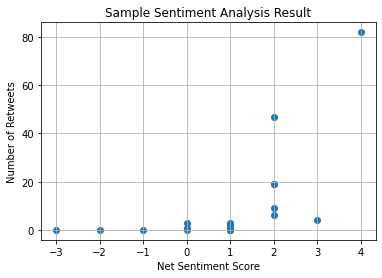

In [15]:
plt.scatter(df["Net Score"],df["Number of Retweets"])
plt.title("Sample Sentiment Analysis Result")
plt.xlabel("Net Sentiment Score")
plt.ylabel("Number of Retweets")
plt.grid()
plt.show()

In [10]:
df

,Number of Retweets,Number of Replies,Positive Score,Negative Score,Net Score
0,3,0,0,0,0
1,1,0,2,0,2
2,1,2,0,0,0
3,3,1,0,0,0
4,6,0,0,0,0
5,9,5,0,0,0
6,19,0,0,0,0
7,0,0,3,0,3
8,0,0,2,0,2
9,82,2,0,0,0
